# Analysis of model convergence for mobility configuration of report 20

This notebook explores the convergence of the model on a consistant prediction as more data is fed into it.
It uses the combination of mobility data recommended by report 20.

 + Pooling formula: `~ -1 + residential + transit + averageMobility`
 + Partial pooling formula: `~ -1 + residential + transit + averageMobility`

In addition two types of mobility processing are used:

- `none` which uses the raw mobility data
- `rolling_mean` which applies a 7 day rolling average to it

This criteria is defined in function `is_desired_pooling`

All functions are defined in [`mobility_model_analyse.ipynb`](mobility_model_analyse.ipynb) it is ran here
using the ipython magic.

In [1]:
%run mobility_model_analyse.ipynb

Must change directory as imports and data are from the root of the project

## Load Data

In [2]:
run_manifest = read_manifest('run-manifest.csv')
analysis_set = get_analysis_set(run_manifest)

## Group data in comparable runs

To group analysis runs we define `is_desired_pooling` which returns a true or false value

In [3]:
def is_desired_pooling(df, x):
    return (
        '~ -1 + residential + transit + averageMobility'
        == df.loc[x, "model"].data["arguments"]["formula_pooling"].strip()
    ) and (
        '~ -1 + residential + transit + averageMobility'
        == df.loc[x, "model"].data["arguments"]["formula_partialpooling"].strip()
    )

groups = analysis_set.groupby(lambda x : group_region_fit_and_pooling(analysis_set, x, is_desired_pooling))

Check what groups have been created

In [4]:
for i, group in enumerate(groups):
    print(f"Group {i + 1} of {len(groups)}: {group[0]}")

Group 1 of 21: ('v2', 'Europe', 'No region', False, '', '')
Group 2 of 21: ('v2', 'Europe', 'With regions', False, '', '')
Group 3 of 21: ('v2', 'France only', 'With regions', False, '', '')
Group 4 of 21: ('v3', 'Europe', 'With regions', False, '', '')
Group 5 of 21: ('v3', 'France only', 'With regions', False, '', '')
Group 6 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1')
Group 7 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + residential + transit + grocery + parks + retail + workplace')
Group 8 of 21: ('v5', 'Europe', 'No region', False, '~ -1 + residential + transit + grocery + parks + retail + workplace', '~ -1 + transit + retail')
Group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')
Group 10 of 21: ('v5', 'Europe', 'With regions', Fal

## Analysis of convergence on France

The next few plots display data for France as a whole modelled from a range of different dates.


In [5]:
french_regions = ["France-hopitaux", "France-OC19"]

### France-hopitaux

Plotting group 13 of 21: ('v5', 'Europe', 'With regions', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')
Plotting group 21 of 21: ('v5', 'France only', 'With regions', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


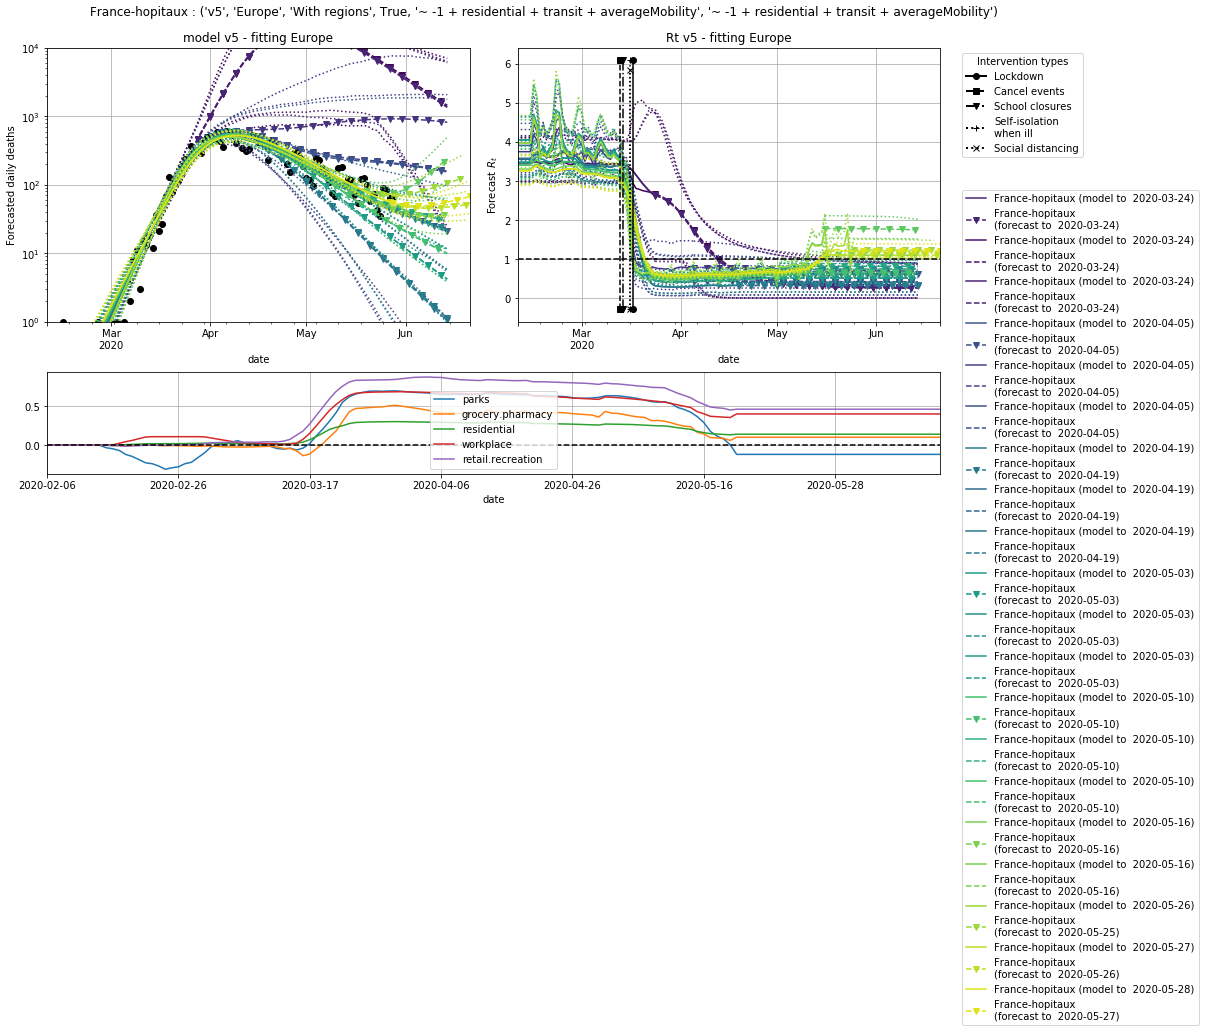

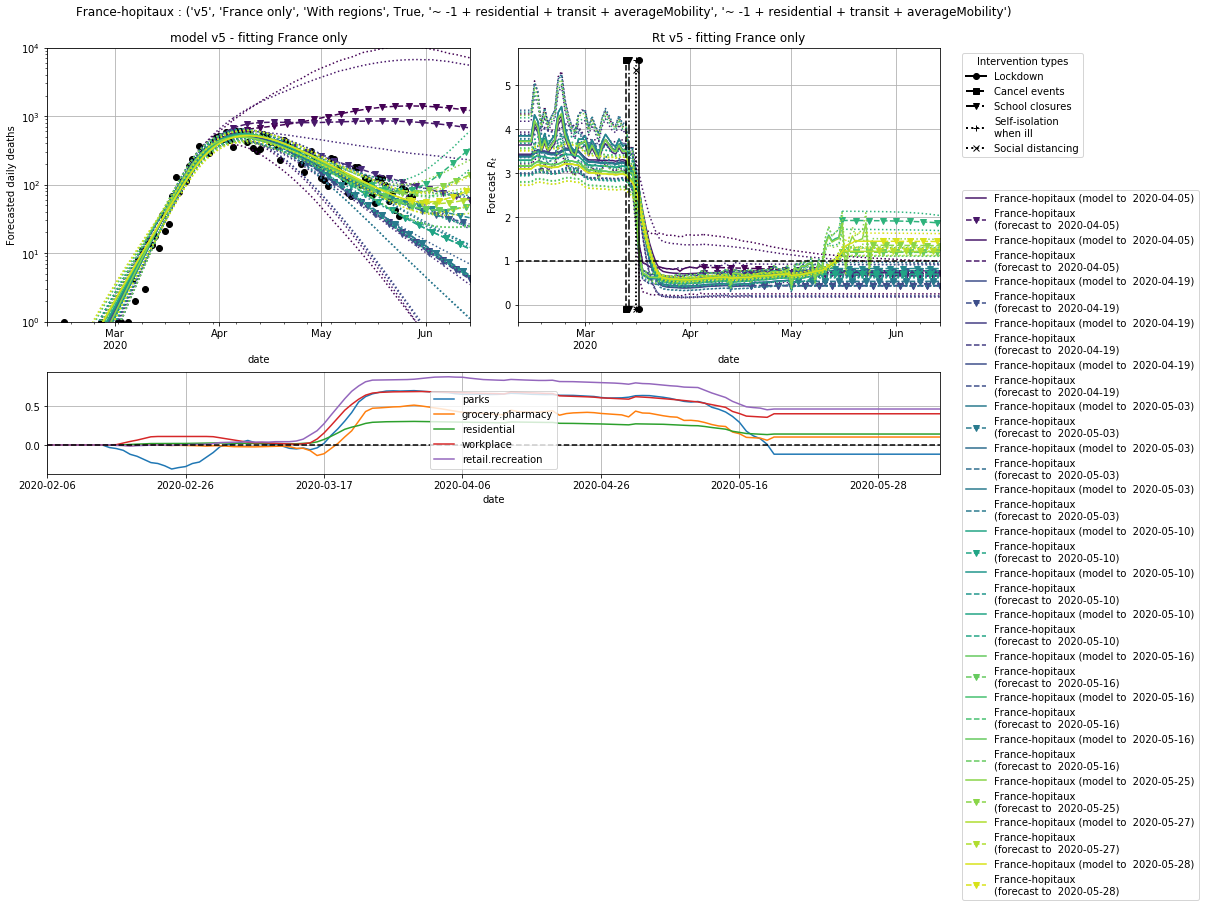

### France-OC19

Plotting group 13 of 21: ('v5', 'Europe', 'With regions', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')
Plotting group 21 of 21: ('v5', 'France only', 'With regions', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


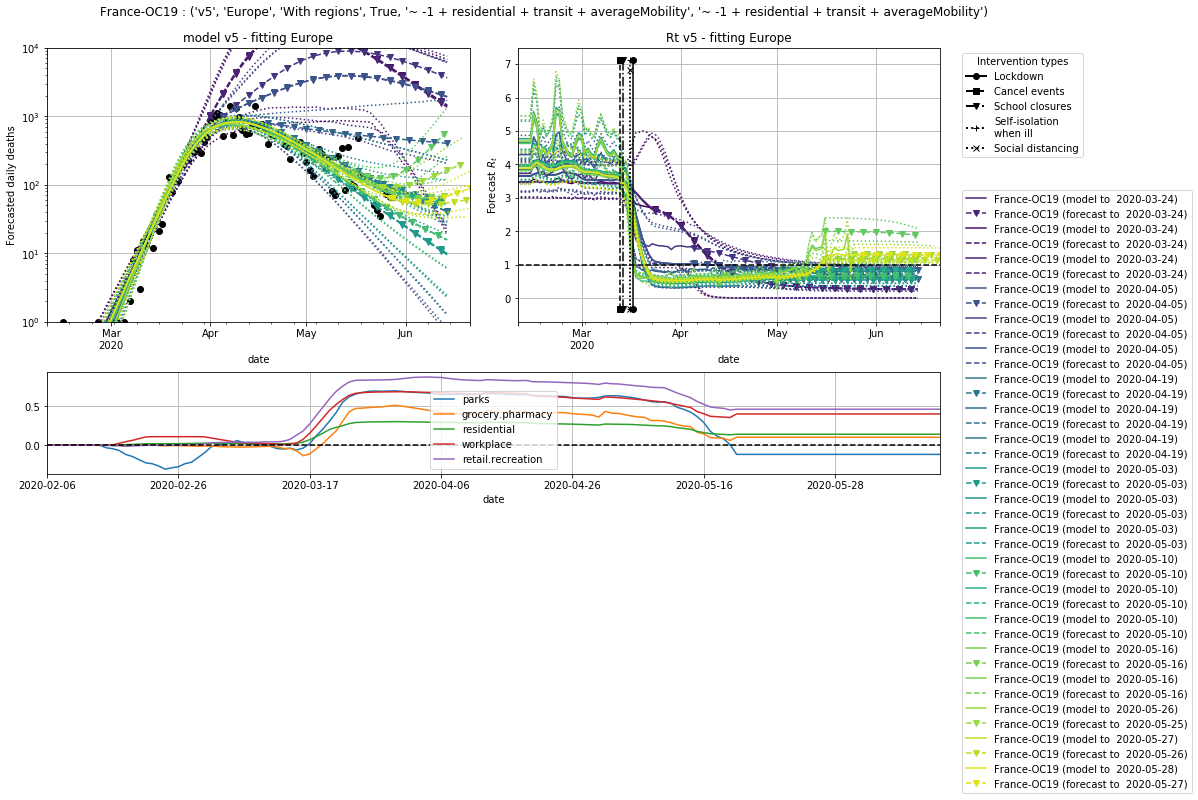

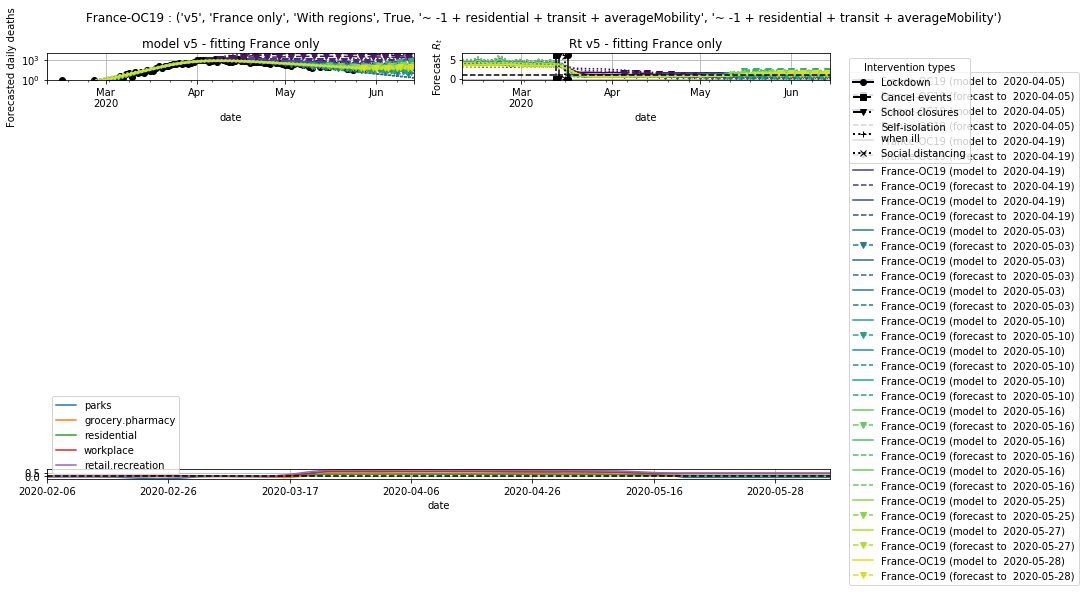

In [6]:
report_on_zones(french_regions, select_with_regions)

## Case study of European countries



In [7]:
countries = ['Spain', 'Italy', "United_Kingdom", 'Germany', 'Netherlands', 'Portugal', 'Denmark', 'Sweden']

### Spain

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


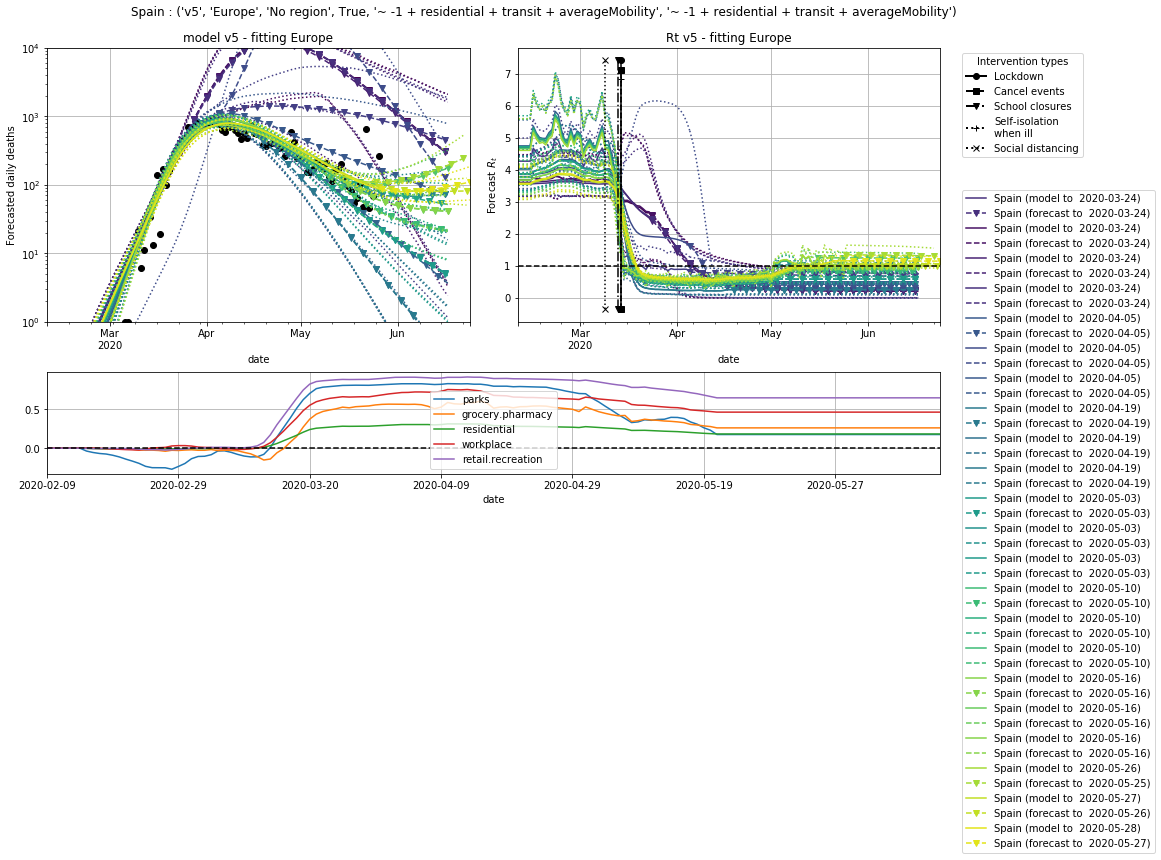

### Italy

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


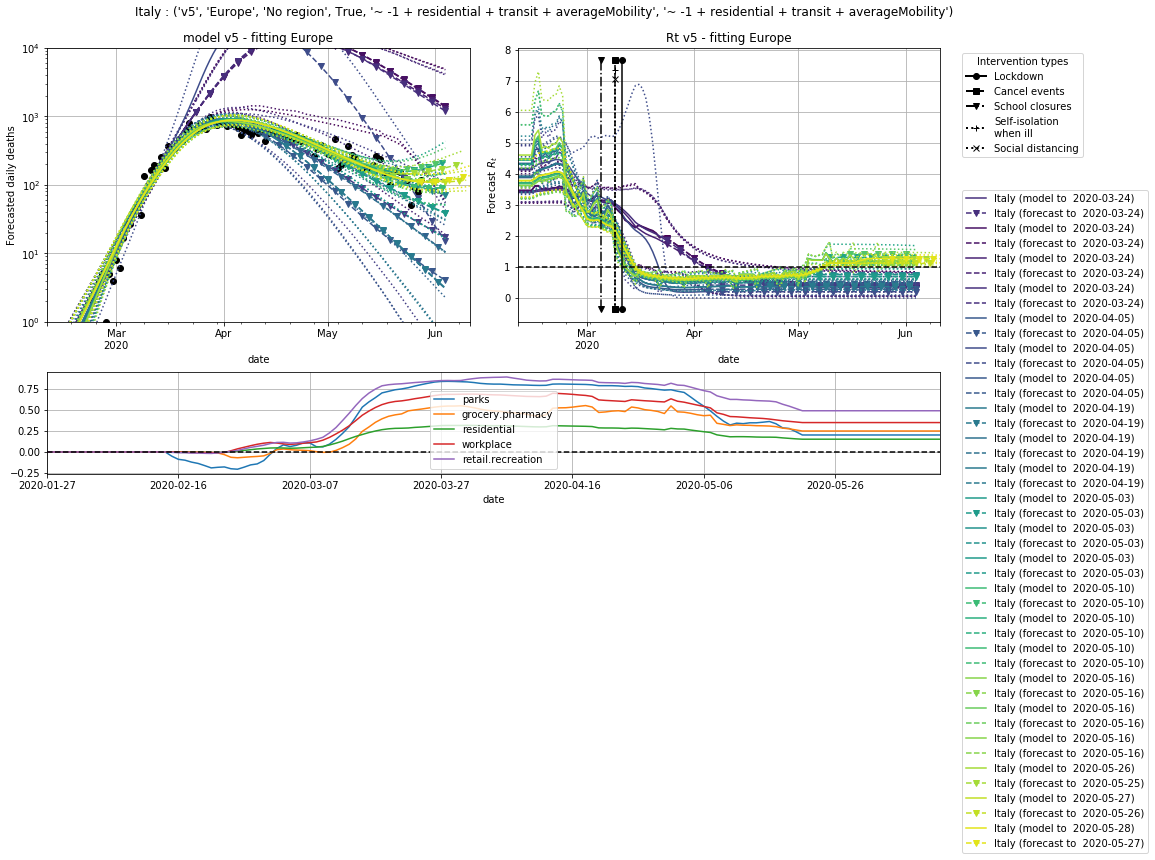

### United_Kingdom

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


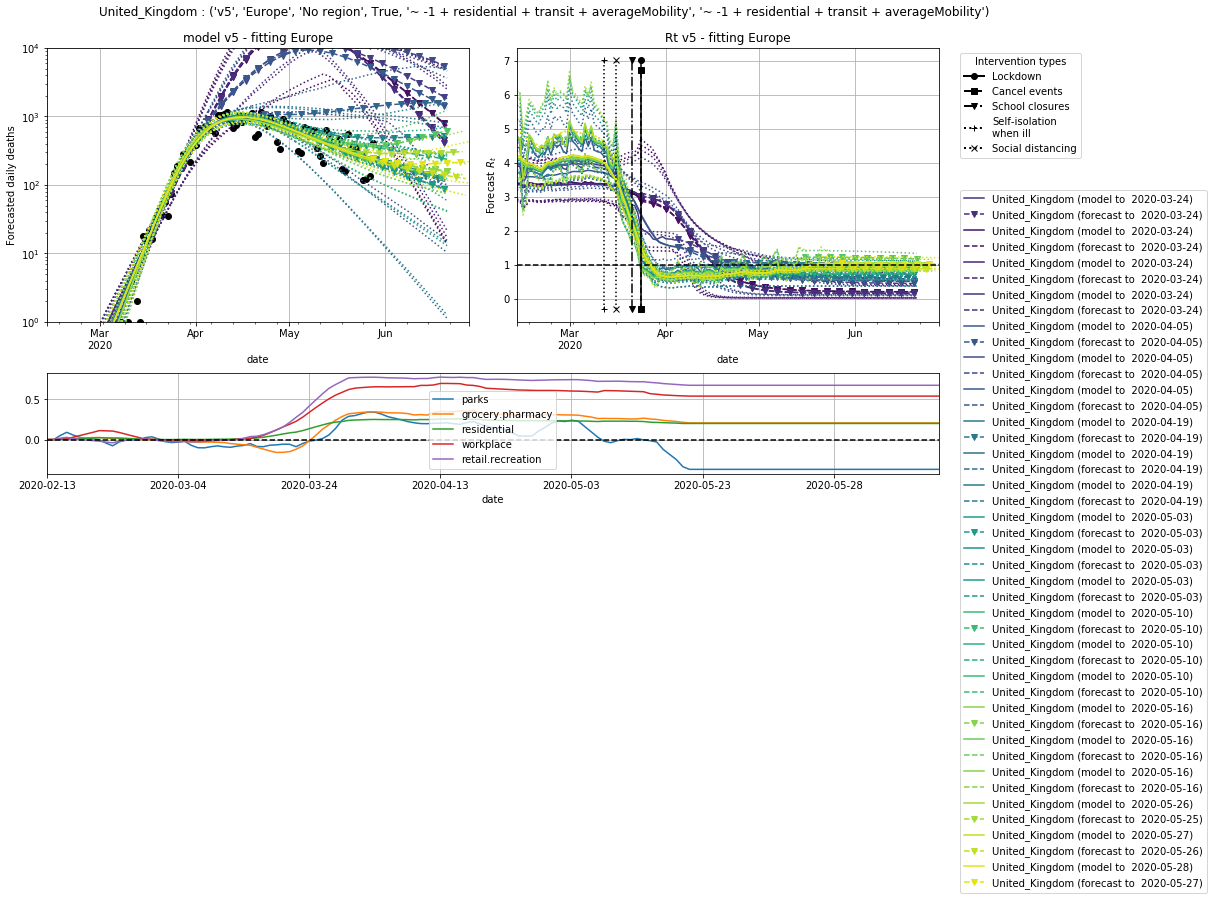

### Germany

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


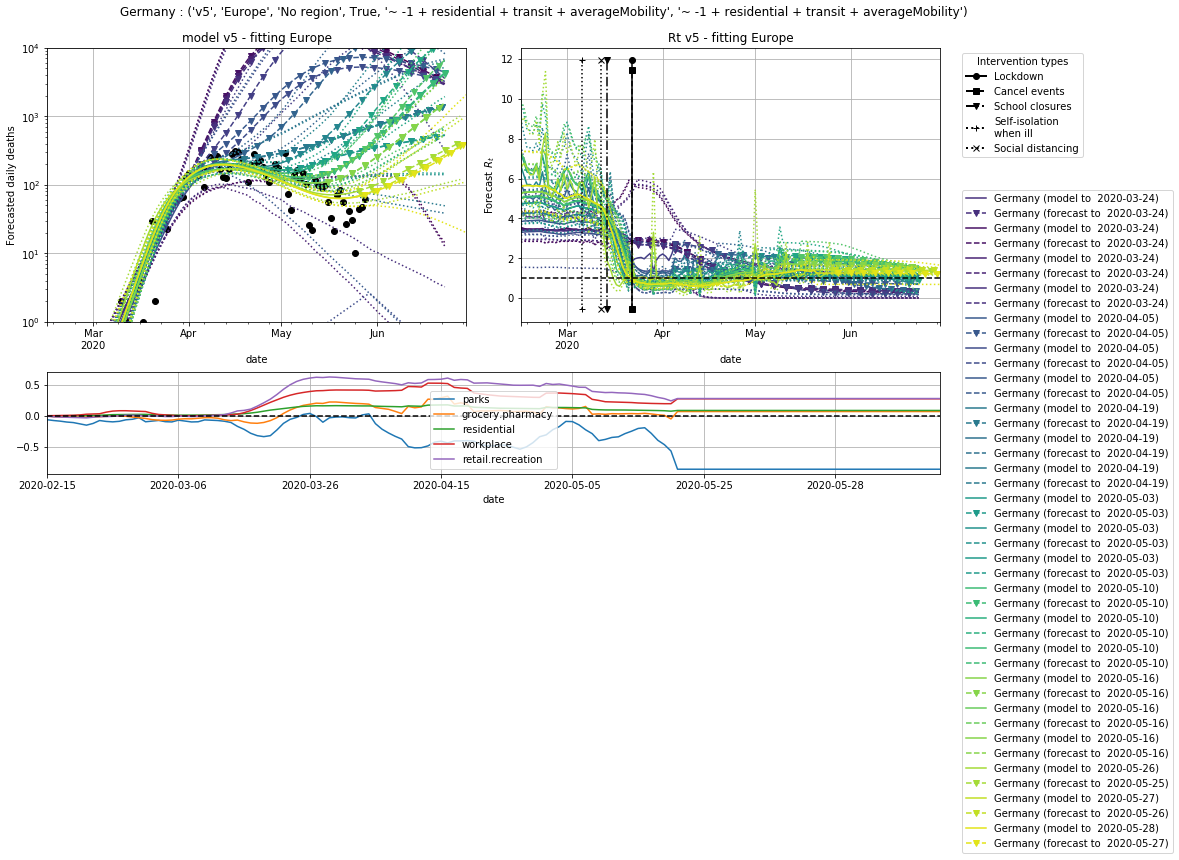

### Netherlands

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


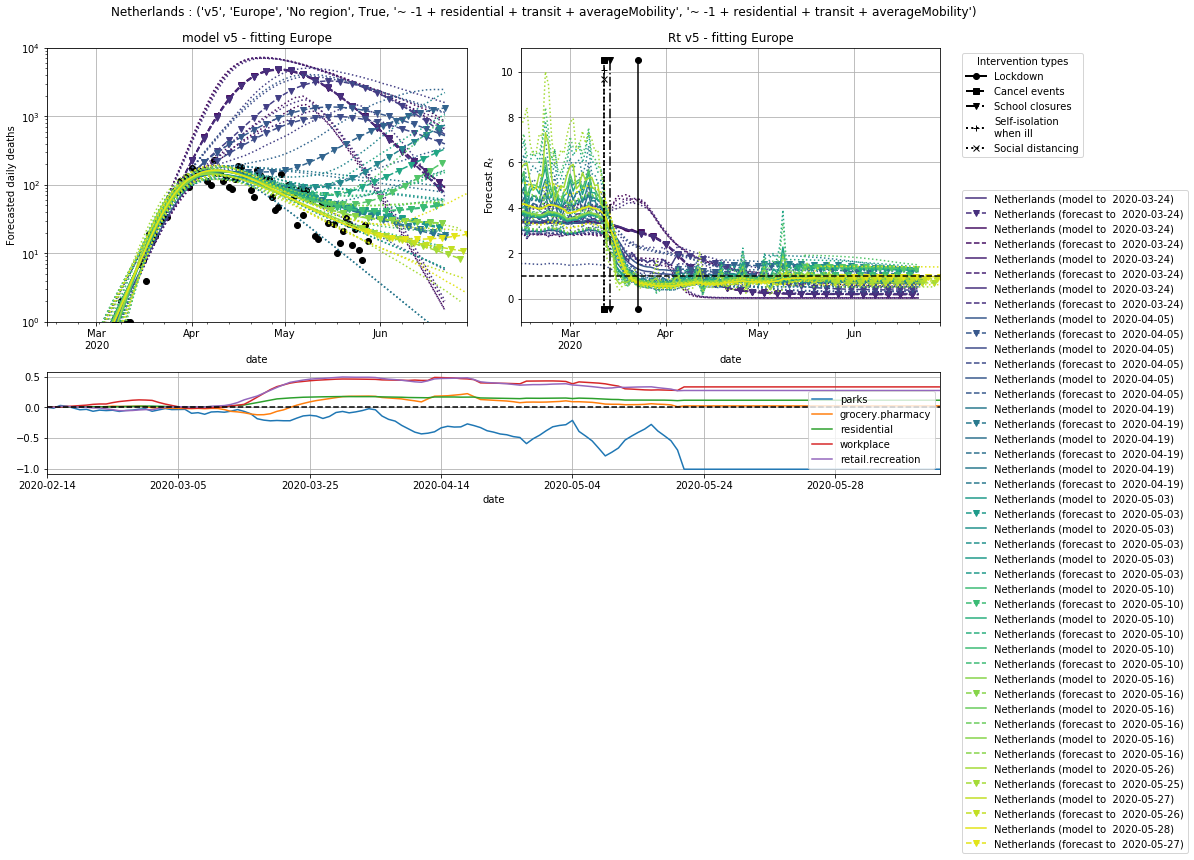

### Portugal

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


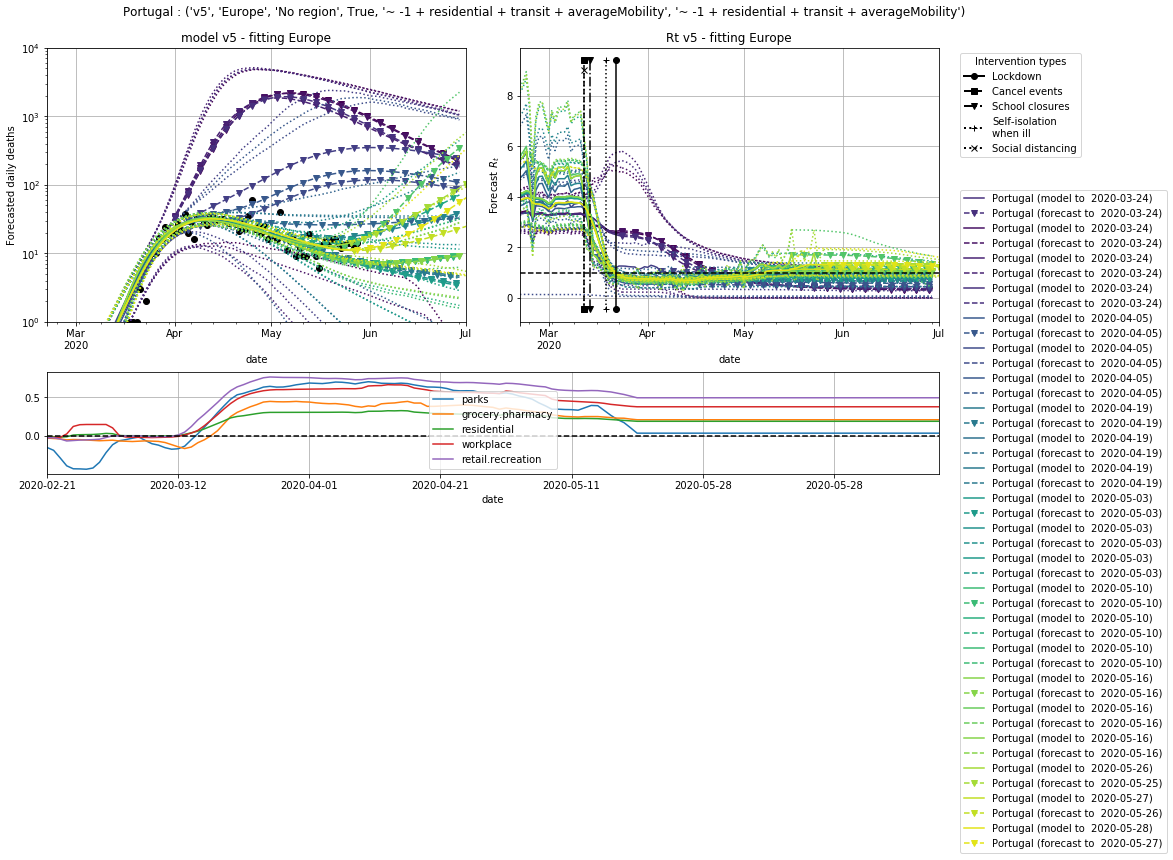

### Denmark

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


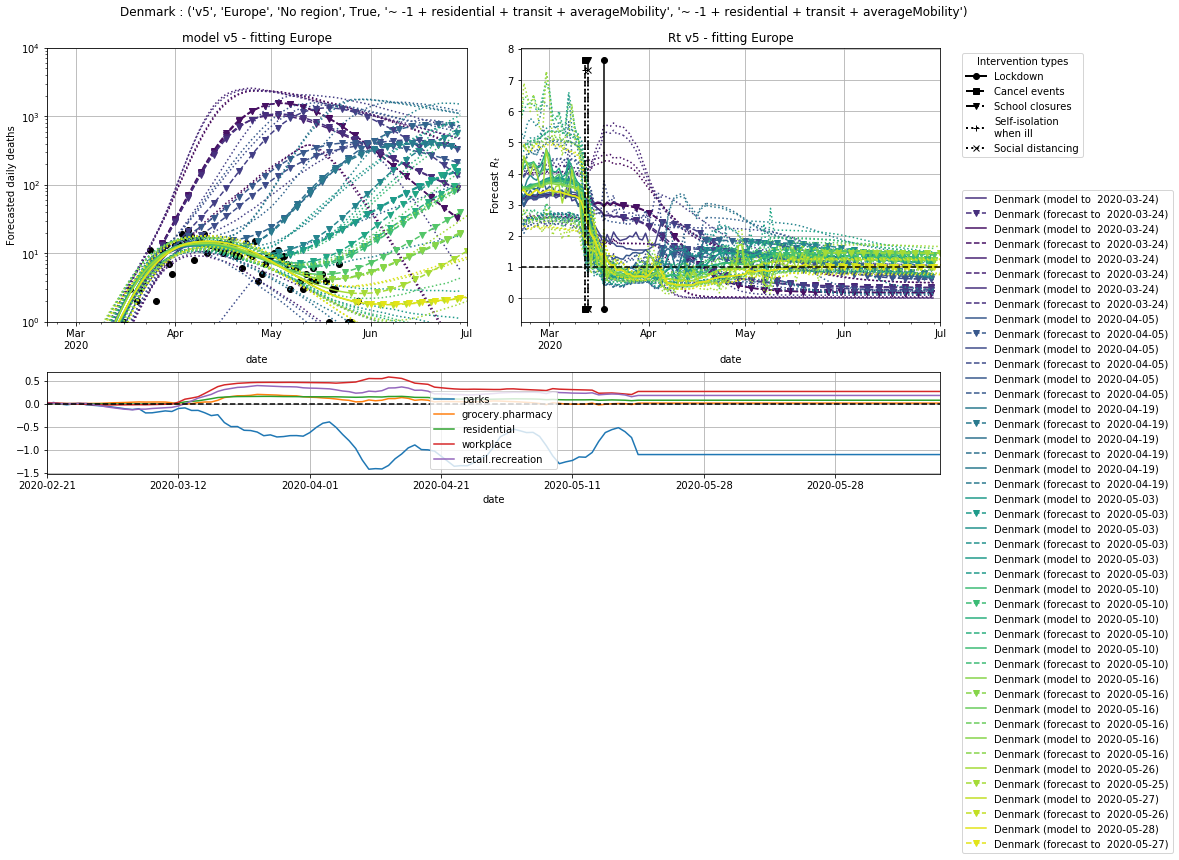

### Sweden

Plotting group 9 of 21: ('v5', 'Europe', 'No region', True, '~ -1 + residential + transit + averageMobility', '~ -1 + residential + transit + averageMobility')


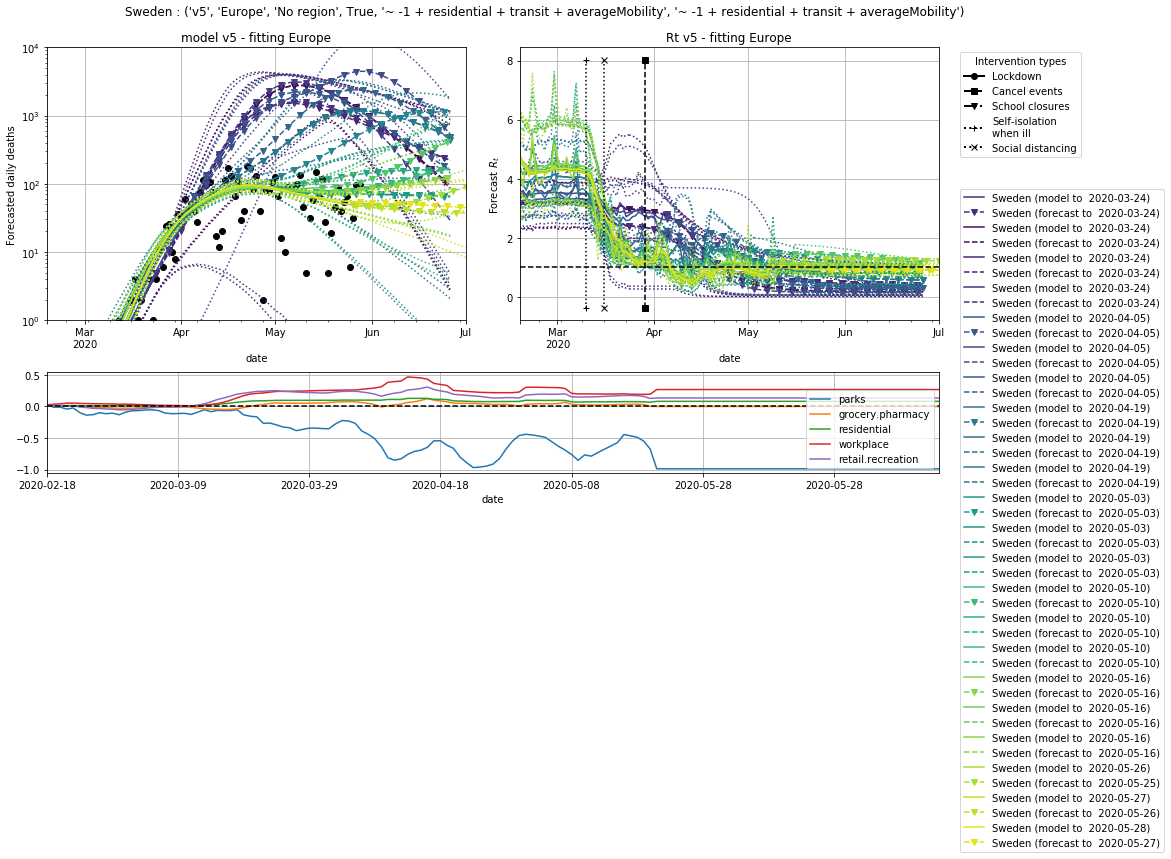

In [8]:
report_on_zones(countries, select_europe_only)

## Conclusions



### Note on convergence



### Future works



## Acknowledgements / Thanks

- The MRC at Imperial for open sourcing the model and their support
- [Nathan Desdouits](https://github.com/nathan-tc) for his advice on cleaning up the colours of the plots.